In [1]:
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import plotly.express as pl

# Example

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [3]:
rng = np.random.RandomState(1)
X = np.sort(100 * rng.rand(600, 1) - 100, axis = 0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (600, 1)
y shape: (600, 2)


In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(
    X, y, train_size = 400, test_size = 200, random_state = 4)

In [ ]:
max_depth = 30
reg_multioutput_rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, 
                                                                max_depth = max_depth,
                                                                random_state = 0))
reg_multioutput_rf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=30,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                

In [ ]:
reg_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
# Predict on new data
y_multirf = reg_multioutput_rf.predict(X_test)
y_rf = reg_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning:

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').



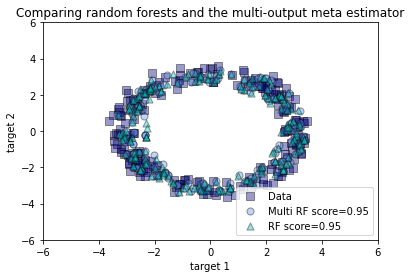

In [ ]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % reg_multioutput_rf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % reg_rf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

# Dataset

In [2]:
!git clone https://github.com/romrawinjp/mn-sim.git

Cloning into 'mn-sim'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 53 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [4]:
mn_type = "tapered-cone"
raw_data = np.load("/content/mn-sim/"+mn_type+"/"+mn_type+"-fixed.npz")
point_raw, young_raw, force_raw, y_raw = raw_data["point"], raw_data["young"], raw_data["force"], raw_data["y"]

In [11]:
test_size = 0.1
sample = point_raw.shape[0]
n = round(sample * test_size)
print(n)

45


In [ ]:
point_train = point_train.reshape(point_train.shape[0], -1)
point_test = point_test.reshape(point_test.shape[0], -1)

In [ ]:
X_train = np.concatenate((point_train, young_train, force_train), axis = 1)
X_test = np.concatenate((point_test, young_test, force_test), axis = 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
reg_multioutput_rf = MultiOutputRegressor(RandomForestRegressor())
reg_multioutput_rf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                              

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_rf = reg_multioutput_rf.predict(X_test)
print("Log mean: ", np.log10(mean_squared_error(y_pred_rf, y_test)))

Log mean:  -7.74152796017273


(array([[44.,  2.,  6., ...,  0.,  0.,  0.],
        [49.,  0.,  0., ...,  0.,  0.,  0.],
        [55.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [55.,  0.,  0., ...,  0.,  0.,  0.],
        [55.,  0.,  0., ...,  0.,  0.,  0.],
        [55.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0.        , 0.04456714, 0.08913428, 0.13370143, 0.17826857,
        0.22283571, 0.26740285, 0.31197   , 0.35653714, 0.40110428,
        0.44567142]),
 <a list of 1024 Lists of Patches objects>)

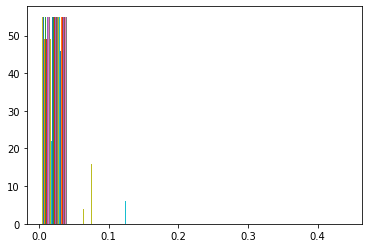

In [ ]:
plt.hist(y_test)

In [ ]:
y_test[7]

array([2.68061344e-02, 2.77642407e-02, 1.28433259e-04, ...,
       9.35449396e-05, 1.99615261e-05, 7.29026397e-04])

In [ ]:
y_pred_rf[7]

array([2.68061344e-02, 2.77642407e-02, 3.07256077e-04, ...,
       1.81590470e-04, 1.99055443e-05, 7.32705855e-04])

(array([[44.,  2.,  6., ...,  0.,  0.,  0.],
        [49.,  0.,  0., ...,  0.,  0.,  0.],
        [55.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [55.,  0.,  0., ...,  0.,  0.,  0.],
        [55.,  0.,  0., ...,  0.,  0.,  0.],
        [55.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0.        , 0.04456714, 0.08913428, 0.13370143, 0.17826857,
        0.22283571, 0.26740285, 0.31197   , 0.35653714, 0.40110428,
        0.44567142]),
 <a list of 1024 Lists of Patches objects>)

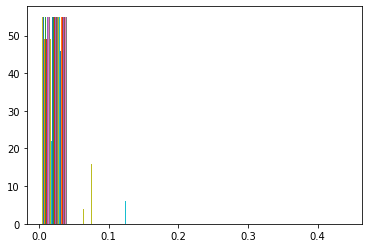

In [ ]:
plt.hist(y_pred_rf)

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = MultiOutputRegressor(LGBMRegressor())

In [ ]:
lgbm.fit(X_train, y_train)

MultiOutputRegressor(estimator=LGBMRegressor(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                   

In [ ]:
y_pred_lgbm = lgbm.predict(X_test)
print("MSE: ", mean_squared_error(y_pred_lgbm, y_test))

MSE:  1.9141502162385474e-13


In [ ]:
import joblib
# save model
joblib.dump(lgbm, 'lgbm.pkl')

['lgbm.pkl']

In [ ]:
# load model
gbm_pickle = joblib.load('lgbm.pkl')

# Test Dataset